**Purpose**: To build a machine learning model that predicts a participant's final knowledge score based on their demographic profile. This helps identify the most influential factors.

# Step 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries for machine learning imported successfully.")

Libraries for machine learning imported successfully.


# Step 2. Loading Cleaned Data

In [3]:
df = pd.read_csv('../data/processed_data/cleaned_hpv_data.csv')
print("Cleaned data loaded.")

Cleaned data loaded.


# Step 3. Feature Engineering and Selection

In [4]:
# We use the original coded numeric columns as features
features = [
    'Age', 'Gender', 'Place_of_Residency', 'Education',
    'Vaccination_Status', 'Health_Care_Access', 'Occupation_of_Parents',
    'Family_Income_per_Month'
]
target = 'post_test_score'

X = df[features]
y = df[target]

print("Features (X) and Target (y) are defined.")


Features (X) and Target (y) are defined.


# Step 4. Splitting Data into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

Data split into 46 training samples and 12 testing samples.


# Step 5. Training a Random Forest Regressor Model

In [6]:
# RandomForest is great because it's powerful and gives us feature importances
model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


# Step 6. Evaluating Model Performance

In [7]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance on Test Set:")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Out-of-Bag (OOB) Score: {model.oob_score_:.3f}")


Model Performance on Test Set:
R-squared (R²): -1.035
Mean Squared Error (MSE): 18.471
Out-of-Bag (OOB) Score: -0.323


# Step 7. Analyzing and Visualizing Feature Importance

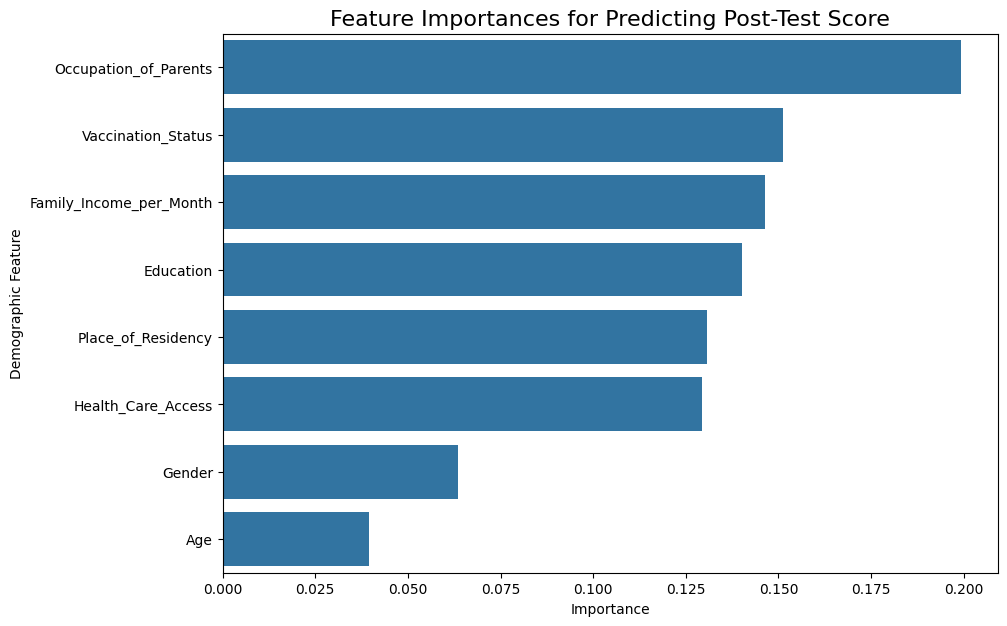

In [8]:
# This tells us which demographic factors were most predictive of the outcome
importances = pd.Series(model.feature_importances_, index=features)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=importances_sorted, y=importances_sorted.index)
plt.title('Feature Importances for Predicting Post-Test Score', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Demographic Feature')
plt.show()